In [1]:
# imports

import pandas as pd
import numpy as np

import regex
import json
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

import holidays


# Clear annoying package and version warnings
import warnings
warnings.filterwarnings('ignore')


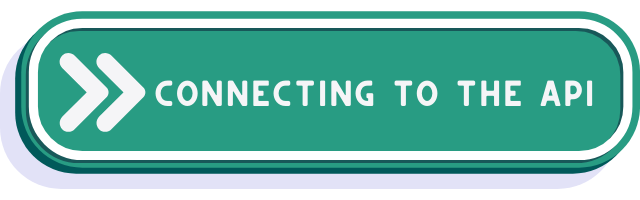

- Socrata provides plenty of documentation and code examples on their site https://dev.socrata.com


In [2]:
# install required packages

!pip install sodapy

In [3]:
# Import the Socrata library

from sodapy import Socrata

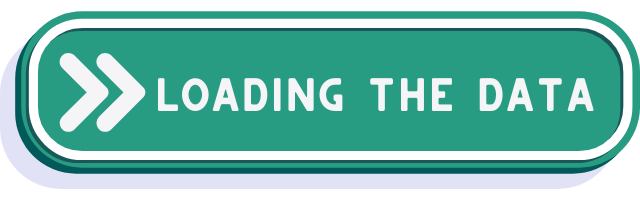

## Load the data from opendata.utah.gov

In [4]:
# Maximize the output width
pd.set_option('display.max_colwidth', None)

# Initialise API

# A lot of the API endpoints can be used without an API key, but you might be throttled. You can signup for free and optain an API key pretty easily

# Use this for the free API access. (Free access has some limits)
client = Socrata("opendata.utah.gov", None)


# OR Use this with your actual API key information
# client = Socrata('opendata.utah.gov',
#                  'API_TOKEN',
#                  username='USERNAME',
#                  password='PASSWORD')


# Grab first 500 results, just to verify connection and json results
results = client.get('a56y-d97m', limit=500)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

results_df

,case,ucr_code,ucr_description,ibr_code,report_date,occ_date,day_of_week,location,council,police_zone,police_grid,location_1,:@computed_region_9p4x_9cjt,:@computed_region_dqjc_k29y,:@computed_region_5phj_cc35,:@computed_region_qmwn_impy
0,SL20143464,3599-0,DRUGS,0,2014-01-07T17:03:00.000,2014-01-07T16:24:00.000,3,200 S SURPRISE AVE,1,ADM,0,NaN,NaN,NaN,NaN,NaN
1,SL20143532,3510-0,DRUGS,0,2014-01-07T19:01:00.000,2014-01-07T16:30:00.000,3,200 S SURPRISE AVE,1,ADM,0,NaN,NaN,NaN,NaN,NaN
2,SL20147474,5707-0,INV OF PRIVACY,0,2014-01-14T17:07:00.000,2014-01-14T17:07:00.000,3,00 RIO GRANDE ST,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,SL20149841,5707-0,INV OF PRIVACY,0,2014-01-18T20:07:00.000,2014-01-18T20:07:00.000,7,00 N RIO GRANDE ST,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,SL20143539,3599-0,DRUGS,0,2014-01-22T15:05:00.000,2014-01-22T15:05:00.000,4,200 S SURPRISE AVE,1,ADM,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,SL201126268,1313-0,ASSAULT,NaN,2011-02-14T16:31:00.000,NaN,2,NaN,1,133,NaN,"{'latitude': '40.7739184805677', 'longitude': '-111.943210896631', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}",NaN,1,16,220
496,SL201127419,2901-0,DAMAGED PROP,290,2011-02-16T16:29:00.000,NaN,3,NaN,1,133,NaN,"{'latitude': '40.7799008518157', 'longitude': '-111.980547279642', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}",NaN,1,16,220
497,SL201126829,3599-99,DRUGS,NaN,2011-02-15T16:15:00.000,NaN,3,NaN,4,212,NaN,"{'latitude': '40.7650531091494', 'longitude': '-111.884692546546', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}",175,12,17,220
498,SL201128214,4902-0,ESCAPE,NaN,2011-02-17T18:45:00.000,NaN,5,NaN,1,133,NaN,"{'latitude': '40.7799008518157', 'longitude': '-111.980547279642', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}",NaN,1,16,220


In [5]:
# There are 295925 rows. So lets grab ALL the data available
data = client.get('a56y-d97m', limit=295925)

df = pd.DataFrame.from_records(data)

df

,case,ucr_code,ucr_description,ibr_code,report_date,occ_date,day_of_week,location,council,police_zone,police_grid,location_1,:@computed_region_9p4x_9cjt,:@computed_region_dqjc_k29y,:@computed_region_5phj_cc35,:@computed_region_qmwn_impy
0,SL20143464,3599-0,DRUGS,0,2014-01-07T17:03:00.000,2014-01-07T16:24:00.000,3,200 S SURPRISE AVE,1,ADM,0,NaN,NaN,NaN,NaN,NaN
1,SL20143532,3510-0,DRUGS,0,2014-01-07T19:01:00.000,2014-01-07T16:30:00.000,3,200 S SURPRISE AVE,1,ADM,0,NaN,NaN,NaN,NaN,NaN
2,SL20147474,5707-0,INV OF PRIVACY,0,2014-01-14T17:07:00.000,2014-01-14T17:07:00.000,3,00 RIO GRANDE ST,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,SL20149841,5707-0,INV OF PRIVACY,0,2014-01-18T20:07:00.000,2014-01-18T20:07:00.000,7,00 N RIO GRANDE ST,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,SL20143539,3599-0,DRUGS,0,2014-01-22T15:05:00.000,2014-01-22T15:05:00.000,4,200 S SURPRISE AVE,1,ADM,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295920,SL2010223801,2399-0,LARCENY,NaN,2010-12-31T00:00:00.000,2010-12-31T00:00:00.000,6,100 W 2100 S,5,234,NaN,"{'latitude': '40.7255618022556', 'longitude': '-111.893802393877', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}",NaN,12,18,220
295921,SL2010223720,5499-7,TRAFFIC,0,2010-12-31T00:00:00.000,2010-12-31T00:00:00.000,6,900 S 900 W,2,152,NaN,"{'latitude': '40.7497813718545', 'longitude': '-111.91615587225', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}",NaN,12,19,220
295922,SL2011800082,7399-6,PUBLIC ORDER,0,2010-12-31T00:00:00.000,2011-01-27T00:00:00.000,6,700 N TERMINAL NORTHBOUND DR,1,133,NaN,"{'latitude': '40.7860534958263', 'longitude': '-111.980117737549', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}",NaN,1,16,220
295923,SL2010223916,7399-26,PUBLIC ORDER,NaN,2010-12-31T00:00:00.000,2010-12-31T00:00:00.000,6,400 S 600 E,4,214,NaN,"{'latitude': '40.7606627177839', 'longitude': '-111.873257919194', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}",NaN,12,19,220


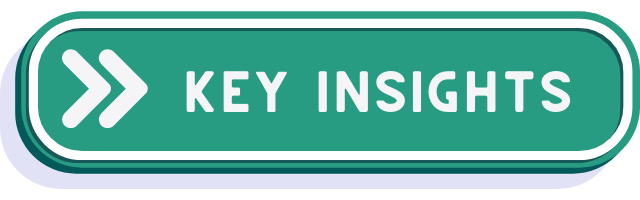

### Insights to look out for

- Count of each crime
- Worst Areas of crime: MAP **(we can do this easier in BI software)**
- Worst dates of crime
- Worst crime by year
- Worst and best day of the week
- Longest time from report date to closing date (Could look at this per crime)
- Seasonal Patterns: Investigate if crime rates vary by season or month

In [6]:
df.dtypes

case                           object
ucr_code                       object
ucr_description                object
ibr_code                       object
report_date                    object
occ_date                       object
day_of_week                    object
location                       object
council                        object
police_zone                    object
police_grid                    object
location_1                     object
:@computed_region_9p4x_9cjt    object
:@computed_region_dqjc_k29y    object
:@computed_region_5phj_cc35    object
:@computed_region_qmwn_impy    object
dtype: object

In [7]:
df.isnull().sum()

case                                0
ucr_code                            0
ucr_description                     6
ibr_code                       130623
report_date                      1810
occ_date                        57114
day_of_week                         0
location                         5901
council                             0
police_zone                      1038
police_grid                    101645
location_1                       2525
:@computed_region_9p4x_9cjt    198841
:@computed_region_dqjc_k29y      2550
:@computed_region_5phj_cc35      2550
:@computed_region_qmwn_impy      3802
dtype: int64

In [8]:
# The computed region codes seem to be for internal use, but I have no need for them so I will just drop them
# There are a few other columns I have no use for that I will also drop

df = df.drop(columns=[':@computed_region_9p4x_9cjt',
':@computed_region_dqjc_k29y',
':@computed_region_5phj_cc35',
':@computed_region_qmwn_impy',
'police_zone',
'police_grid',
 'council',
 'ibr_code',
 ])

df

,case,ucr_code,ucr_description,report_date,occ_date,day_of_week,location,location_1
0,SL20143464,3599-0,DRUGS,2014-01-07T17:03:00.000,2014-01-07T16:24:00.000,3,200 S SURPRISE AVE,NaN
1,SL20143532,3510-0,DRUGS,2014-01-07T19:01:00.000,2014-01-07T16:30:00.000,3,200 S SURPRISE AVE,NaN
2,SL20147474,5707-0,INV OF PRIVACY,2014-01-14T17:07:00.000,2014-01-14T17:07:00.000,3,00 RIO GRANDE ST,NaN
3,SL20149841,5707-0,INV OF PRIVACY,2014-01-18T20:07:00.000,2014-01-18T20:07:00.000,7,00 N RIO GRANDE ST,NaN
4,SL20143539,3599-0,DRUGS,2014-01-22T15:05:00.000,2014-01-22T15:05:00.000,4,200 S SURPRISE AVE,NaN
...,...,...,...,...,...,...,...,...
295920,SL2010223801,2399-0,LARCENY,2010-12-31T00:00:00.000,2010-12-31T00:00:00.000,6,100 W 2100 S,"{'latitude': '40.7255618022556', 'longitude': '-111.893802393877', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}"
295921,SL2010223720,5499-7,TRAFFIC,2010-12-31T00:00:00.000,2010-12-31T00:00:00.000,6,900 S 900 W,"{'latitude': '40.7497813718545', 'longitude': '-111.91615587225', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}"
295922,SL2011800082,7399-6,PUBLIC ORDER,2010-12-31T00:00:00.000,2011-01-27T00:00:00.000,6,700 N TERMINAL NORTHBOUND DR,"{'latitude': '40.7860534958263', 'longitude': '-111.980117737549', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}"
295923,SL2010223916,7399-26,PUBLIC ORDER,2010-12-31T00:00:00.000,2010-12-31T00:00:00.000,6,400 S 600 E,"{'latitude': '40.7606627177839', 'longitude': '-111.873257919194', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}"


In [9]:
df.dtypes

case               object
ucr_code           object
ucr_description    object
report_date        object
occ_date           object
day_of_week        object
location           object
location_1         object
dtype: object

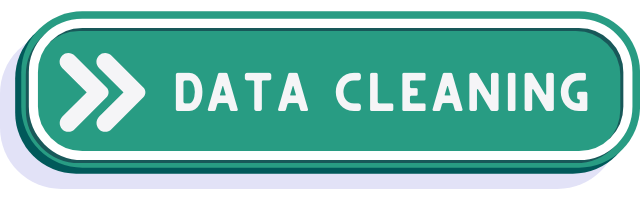

## Data Cleaning Steps

- **Deal with Duplicates:**
    - Identified and removed Duplicates that were not purposeful
- **Fix or Remove NA Values:**
    - Removed rows/columns with NA values
    - Separated data into two to track same day closing, and cases that took time to close
- **Correct Incorrect Data:**
    - Some cases were listed as ‘Closed’ before they were reported
- **Handling Missing Values:**
    - Missing values are different than NA values
    - Handled a few cases of missing data (2015 was removed as it only had under 100 cases total and would skew yearly results)
- **Fix Data Types:**
    - Converted all dates to date types
    - Converted location data to longitude and latitude for mapping
- **Fix Column Names:**
    - Standardizes column names and removed for easier understanding
    - Removed irrelevant columns to simplify the data we are working with
- **Handling Outliers:**
    - Used Interquartile Range (IQR) to identify outliers
    - Split data in two with and without outliers to identify their significance
- **Standardizing Formats:**
    - Ensure consistency in date formats and numerical formats for graphing and calculations
- **Data Validation:**
    - Performed consistency checks to verify data
- **Data Aggregation:**
    - Grouped data by Crime and by dates to discover trends
    - Aggregate existing data to create new values to help identify trends
- **Documenting Data Cleaning Steps:**
    - Keep a record of the data cleaning steps performed to ensure reproducibility and to provide clarity for your future self or other team members.


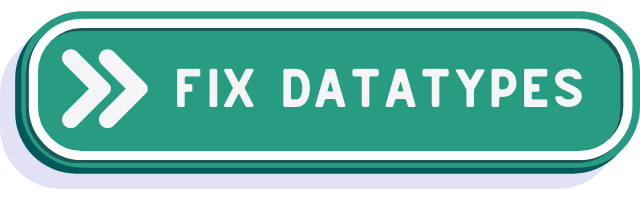

## Let's fix our datatypes

- both date columns should be dates, and day of the week we may want to convert to READ out the day of the week

#### Days of the week should read out as the actual day, not numerical

- We can create a dictionary to re-assign all the values

In [10]:
df['day_of_week'].value_counts()

day_of_week
6    45807
5    45606
4    43722
7    42343
3    42307
2    41715
1    34424
0        1
Name: count, dtype: int64

In [11]:
# I verified several days in the data to create this mapping

days_of_week = {
    '1': 'Sunday',
    '2': 'Monday',
    '3': 'Tuesday',
    '4': 'Wednesday',
    '5': 'Thursday',
    '6': 'Friday',
    '7': 'Saturday'
}


df['day_of_week'] = df['day_of_week'].map(days_of_week)

df

,case,ucr_code,ucr_description,report_date,occ_date,day_of_week,location,location_1
0,SL20143464,3599-0,DRUGS,2014-01-07T17:03:00.000,2014-01-07T16:24:00.000,Tuesday,200 S SURPRISE AVE,NaN
1,SL20143532,3510-0,DRUGS,2014-01-07T19:01:00.000,2014-01-07T16:30:00.000,Tuesday,200 S SURPRISE AVE,NaN
2,SL20147474,5707-0,INV OF PRIVACY,2014-01-14T17:07:00.000,2014-01-14T17:07:00.000,Tuesday,00 RIO GRANDE ST,NaN
3,SL20149841,5707-0,INV OF PRIVACY,2014-01-18T20:07:00.000,2014-01-18T20:07:00.000,Saturday,00 N RIO GRANDE ST,NaN
4,SL20143539,3599-0,DRUGS,2014-01-22T15:05:00.000,2014-01-22T15:05:00.000,Wednesday,200 S SURPRISE AVE,NaN
...,...,...,...,...,...,...,...,...
295920,SL2010223801,2399-0,LARCENY,2010-12-31T00:00:00.000,2010-12-31T00:00:00.000,Friday,100 W 2100 S,"{'latitude': '40.7255618022556', 'longitude': '-111.893802393877', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}"
295921,SL2010223720,5499-7,TRAFFIC,2010-12-31T00:00:00.000,2010-12-31T00:00:00.000,Friday,900 S 900 W,"{'latitude': '40.7497813718545', 'longitude': '-111.91615587225', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}"
295922,SL2011800082,7399-6,PUBLIC ORDER,2010-12-31T00:00:00.000,2011-01-27T00:00:00.000,Friday,700 N TERMINAL NORTHBOUND DR,"{'latitude': '40.7860534958263', 'longitude': '-111.980117737549', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}"
295923,SL2010223916,7399-26,PUBLIC ORDER,2010-12-31T00:00:00.000,2010-12-31T00:00:00.000,Friday,400 S 600 E,"{'latitude': '40.7606627177839', 'longitude': '-111.873257919194', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}"


In [12]:
df['day_of_week'].value_counts()

day_of_week
Friday       45807
Thursday     45606
Wednesday    43722
Saturday     42343
Tuesday      42307
Monday       41715
Sunday       34424
Name: count, dtype: int64

In [13]:
# Convert to just date without the timestamp
df['occ_date'] = pd.to_datetime(df['occ_date']).dt.date
df['report_date'] = pd.to_datetime(df['report_date']).dt.date

# set datatype as datetime
df['occ_date'] = pd.to_datetime(df['occ_date'])
df['report_date'] = pd.to_datetime(df['report_date'])

df.dtypes

case                       object
ucr_code                   object
ucr_description            object
report_date        datetime64[ns]
occ_date           datetime64[ns]
day_of_week                object
location                   object
location_1                 object
dtype: object

In [14]:
df.dropna()

df

,case,ucr_code,ucr_description,report_date,occ_date,day_of_week,location,location_1
0,SL20143464,3599-0,DRUGS,2014-01-07,2014-01-07,Tuesday,200 S SURPRISE AVE,NaN
1,SL20143532,3510-0,DRUGS,2014-01-07,2014-01-07,Tuesday,200 S SURPRISE AVE,NaN
2,SL20147474,5707-0,INV OF PRIVACY,2014-01-14,2014-01-14,Tuesday,00 RIO GRANDE ST,NaN
3,SL20149841,5707-0,INV OF PRIVACY,2014-01-18,2014-01-18,Saturday,00 N RIO GRANDE ST,NaN
4,SL20143539,3599-0,DRUGS,2014-01-22,2014-01-22,Wednesday,200 S SURPRISE AVE,NaN
...,...,...,...,...,...,...,...,...
295920,SL2010223801,2399-0,LARCENY,2010-12-31,2010-12-31,Friday,100 W 2100 S,"{'latitude': '40.7255618022556', 'longitude': '-111.893802393877', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}"
295921,SL2010223720,5499-7,TRAFFIC,2010-12-31,2010-12-31,Friday,900 S 900 W,"{'latitude': '40.7497813718545', 'longitude': '-111.91615587225', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}"
295922,SL2011800082,7399-6,PUBLIC ORDER,2010-12-31,2011-01-27,Friday,700 N TERMINAL NORTHBOUND DR,"{'latitude': '40.7860534958263', 'longitude': '-111.980117737549', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}"
295923,SL2010223916,7399-26,PUBLIC ORDER,2010-12-31,2010-12-31,Friday,400 S 600 E,"{'latitude': '40.7606627177839', 'longitude': '-111.873257919194', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}"


In [15]:
# Lets rename columns for readability

df = df.rename(columns={"ucr_code": "crime_code", "ucr_description": "crime_description", "occ_date": "closed_date"})

In [16]:
# Extract month and Year
df['month'] = df['report_date'].dt.to_period('M')

df['year'] = df['report_date'].dt.to_period('Y')

df

,case,crime_code,crime_description,report_date,closed_date,day_of_week,location,location_1,month,year
0,SL20143464,3599-0,DRUGS,2014-01-07,2014-01-07,Tuesday,200 S SURPRISE AVE,NaN,2014-01,2014
1,SL20143532,3510-0,DRUGS,2014-01-07,2014-01-07,Tuesday,200 S SURPRISE AVE,NaN,2014-01,2014
2,SL20147474,5707-0,INV OF PRIVACY,2014-01-14,2014-01-14,Tuesday,00 RIO GRANDE ST,NaN,2014-01,2014
3,SL20149841,5707-0,INV OF PRIVACY,2014-01-18,2014-01-18,Saturday,00 N RIO GRANDE ST,NaN,2014-01,2014
4,SL20143539,3599-0,DRUGS,2014-01-22,2014-01-22,Wednesday,200 S SURPRISE AVE,NaN,2014-01,2014
...,...,...,...,...,...,...,...,...,...,...
295920,SL2010223801,2399-0,LARCENY,2010-12-31,2010-12-31,Friday,100 W 2100 S,"{'latitude': '40.7255618022556', 'longitude': '-111.893802393877', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}",2010-12,2010
295921,SL2010223720,5499-7,TRAFFIC,2010-12-31,2010-12-31,Friday,900 S 900 W,"{'latitude': '40.7497813718545', 'longitude': '-111.91615587225', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}",2010-12,2010
295922,SL2011800082,7399-6,PUBLIC ORDER,2010-12-31,2011-01-27,Friday,700 N TERMINAL NORTHBOUND DR,"{'latitude': '40.7860534958263', 'longitude': '-111.980117737549', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}",2010-12,2010
295923,SL2010223916,7399-26,PUBLIC ORDER,2010-12-31,2010-12-31,Friday,400 S 600 E,"{'latitude': '40.7606627177839', 'longitude': '-111.873257919194', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}",2010-12,2010


In [17]:
df['year'].value_counts()

year
2012    61165
2014    59891
2013    59620
2010    58167
2011    55247
2015       25
Freq: Y-DEC, Name: count, dtype: int64

In [18]:
df['year'].value_counts().mean()

49019.166666666664

### The year 2025 is incomplete, so lets remove it from our data

In [19]:
df = df.loc[df['year'] != '2015']

df = df.reset_index(drop=True)

df

,case,crime_code,crime_description,report_date,closed_date,day_of_week,location,location_1,month,year
0,SL20143464,3599-0,DRUGS,2014-01-07,2014-01-07,Tuesday,200 S SURPRISE AVE,NaN,2014-01,2014
1,SL20143532,3510-0,DRUGS,2014-01-07,2014-01-07,Tuesday,200 S SURPRISE AVE,NaN,2014-01,2014
2,SL20147474,5707-0,INV OF PRIVACY,2014-01-14,2014-01-14,Tuesday,00 RIO GRANDE ST,NaN,2014-01,2014
3,SL20149841,5707-0,INV OF PRIVACY,2014-01-18,2014-01-18,Saturday,00 N RIO GRANDE ST,NaN,2014-01,2014
4,SL20143539,3599-0,DRUGS,2014-01-22,2014-01-22,Wednesday,200 S SURPRISE AVE,NaN,2014-01,2014
...,...,...,...,...,...,...,...,...,...,...
295895,SL2010223801,2399-0,LARCENY,2010-12-31,2010-12-31,Friday,100 W 2100 S,"{'latitude': '40.7255618022556', 'longitude': '-111.893802393877', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}",2010-12,2010
295896,SL2010223720,5499-7,TRAFFIC,2010-12-31,2010-12-31,Friday,900 S 900 W,"{'latitude': '40.7497813718545', 'longitude': '-111.91615587225', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}",2010-12,2010
295897,SL2011800082,7399-6,PUBLIC ORDER,2010-12-31,2011-01-27,Friday,700 N TERMINAL NORTHBOUND DR,"{'latitude': '40.7860534958263', 'longitude': '-111.980117737549', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}",2010-12,2010
295898,SL2010223916,7399-26,PUBLIC ORDER,2010-12-31,2010-12-31,Friday,400 S 600 E,"{'latitude': '40.7606627177839', 'longitude': '-111.873257919194', 'human_address': '{""address"": """", ""city"": ""SALT LAKE CITY"", ""state"": """", ""zip"": """"}'}",2010-12,2010


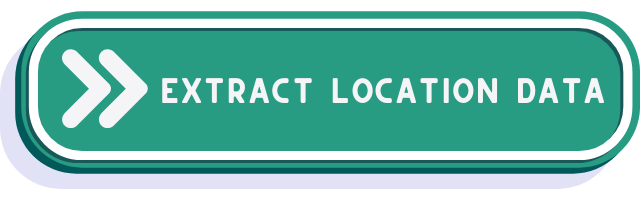

### I want to extract the latitude and longitude data from the 'location_1' column

In [20]:
location_df = df


# Extract the json data from 'location_1'
location_data = pd.json_normalize(location_df['location_1'])

# Combine with the original Data
location_df = location_df.join(location_data)

# Drop the columns we dont need
location_df = location_df.drop(columns=['location_1', 'human_address', 'year', 'month'])

location_df

,case,crime_code,crime_description,report_date,closed_date,day_of_week,location,latitude,longitude
0,SL20143464,3599-0,DRUGS,2014-01-07,2014-01-07,Tuesday,200 S SURPRISE AVE,NaN,NaN
1,SL20143532,3510-0,DRUGS,2014-01-07,2014-01-07,Tuesday,200 S SURPRISE AVE,NaN,NaN
2,SL20147474,5707-0,INV OF PRIVACY,2014-01-14,2014-01-14,Tuesday,00 RIO GRANDE ST,NaN,NaN
3,SL20149841,5707-0,INV OF PRIVACY,2014-01-18,2014-01-18,Saturday,00 N RIO GRANDE ST,NaN,NaN
4,SL20143539,3599-0,DRUGS,2014-01-22,2014-01-22,Wednesday,200 S SURPRISE AVE,NaN,NaN
...,...,...,...,...,...,...,...,...,...
295895,SL2010223801,2399-0,LARCENY,2010-12-31,2010-12-31,Friday,100 W 2100 S,40.7255618022556,-111.893802393877
295896,SL2010223720,5499-7,TRAFFIC,2010-12-31,2010-12-31,Friday,900 S 900 W,40.7497813718545,-111.91615587225
295897,SL2011800082,7399-6,PUBLIC ORDER,2010-12-31,2011-01-27,Friday,700 N TERMINAL NORTHBOUND DR,40.7860534958263,-111.980117737549
295898,SL2010223916,7399-26,PUBLIC ORDER,2010-12-31,2010-12-31,Friday,400 S 600 E,40.7606627177839,-111.873257919194


In [21]:
# drop our now unused column and split long and lat data from our main dataframe
df = df.drop(columns='location_1')


# We can store location data in just our location df, and keep the Case # as the key to pair with our original data
location_df = location_df.drop(columns=['crime_code', 'closed_date', 'day_of_week']).reset_index(drop=True)

### we still have some NA values in our location df that weren't filtered when we copied the df.

- Lets remove those now since this location_df is only being used to do analysis on locations. 


In [22]:
location_df = location_df.dropna().reset_index(drop=True)

location_df

,case,crime_description,report_date,location,latitude,longitude
0,SL201456623,TRAFFIC,2014-04-08,1300 E 800 S,40.7519390637648,-111.853111046075
1,SL201468342,TRAFFIC,2014-04-28,2500 W S.R. 186,40.7799640668409,-111.980526062841
2,SL201486138,ASSAULT,2014-05-28,5500 YELLOWSTONE DR\,43.3012484556815,-119.007712206337
3,SL2014801762,PUBLIC ORDER,2014-06-03,200 W 700 N,40.7844146311671,-111.897786589321
4,SL2014801677,LARCENY,2014-05-28,00 E 600 S,40.7562731949879,-111.889558783974
...,...,...,...,...,...,...
287081,SL2010223801,LARCENY,2010-12-31,100 W 2100 S,40.7255618022556,-111.893802393877
287082,SL2010223720,TRAFFIC,2010-12-31,900 S 900 W,40.7497813718545,-111.91615587225
287083,SL2011800082,PUBLIC ORDER,2010-12-31,700 N TERMINAL NORTHBOUND DR,40.7860534958263,-111.980117737549
287084,SL2010223916,PUBLIC ORDER,2010-12-31,400 S 600 E,40.7606627177839,-111.873257919194


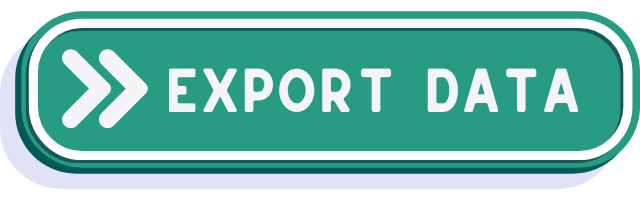

In [23]:
# Export the data so I can use the lat and long data to map the locations
location_df.to_csv('crime_locations.csv') 

### Focus back on our main df

In [24]:
df.isna().sum()

case                     0
crime_code               0
crime_description        6
report_date           1810
closed_date          57114
day_of_week              1
location              5898
month                 1810
year                  1810
dtype: int64

In [25]:
df

,case,crime_code,crime_description,report_date,closed_date,day_of_week,location,month,year
0,SL20143464,3599-0,DRUGS,2014-01-07,2014-01-07,Tuesday,200 S SURPRISE AVE,2014-01,2014
1,SL20143532,3510-0,DRUGS,2014-01-07,2014-01-07,Tuesday,200 S SURPRISE AVE,2014-01,2014
2,SL20147474,5707-0,INV OF PRIVACY,2014-01-14,2014-01-14,Tuesday,00 RIO GRANDE ST,2014-01,2014
3,SL20149841,5707-0,INV OF PRIVACY,2014-01-18,2014-01-18,Saturday,00 N RIO GRANDE ST,2014-01,2014
4,SL20143539,3599-0,DRUGS,2014-01-22,2014-01-22,Wednesday,200 S SURPRISE AVE,2014-01,2014
...,...,...,...,...,...,...,...,...,...
295895,SL2010223801,2399-0,LARCENY,2010-12-31,2010-12-31,Friday,100 W 2100 S,2010-12,2010
295896,SL2010223720,5499-7,TRAFFIC,2010-12-31,2010-12-31,Friday,900 S 900 W,2010-12,2010
295897,SL2011800082,7399-6,PUBLIC ORDER,2010-12-31,2011-01-27,Friday,700 N TERMINAL NORTHBOUND DR,2010-12,2010
295898,SL2010223916,7399-26,PUBLIC ORDER,2010-12-31,2010-12-31,Friday,400 S 600 E,2010-12,2010


In [26]:
# Lets drop our NA values from the report date, there arent that many so we can actually improve the data by removing them

df = df.dropna(subset=['report_date']).reset_index(drop=True)
df

,case,crime_code,crime_description,report_date,closed_date,day_of_week,location,month,year
0,SL20143464,3599-0,DRUGS,2014-01-07,2014-01-07,Tuesday,200 S SURPRISE AVE,2014-01,2014
1,SL20143532,3510-0,DRUGS,2014-01-07,2014-01-07,Tuesday,200 S SURPRISE AVE,2014-01,2014
2,SL20147474,5707-0,INV OF PRIVACY,2014-01-14,2014-01-14,Tuesday,00 RIO GRANDE ST,2014-01,2014
3,SL20149841,5707-0,INV OF PRIVACY,2014-01-18,2014-01-18,Saturday,00 N RIO GRANDE ST,2014-01,2014
4,SL20143539,3599-0,DRUGS,2014-01-22,2014-01-22,Wednesday,200 S SURPRISE AVE,2014-01,2014
...,...,...,...,...,...,...,...,...,...
294085,SL2010223801,2399-0,LARCENY,2010-12-31,2010-12-31,Friday,100 W 2100 S,2010-12,2010
294086,SL2010223720,5499-7,TRAFFIC,2010-12-31,2010-12-31,Friday,900 S 900 W,2010-12,2010
294087,SL2011800082,7399-6,PUBLIC ORDER,2010-12-31,2011-01-27,Friday,700 N TERMINAL NORTHBOUND DR,2010-12,2010
294088,SL2010223916,7399-26,PUBLIC ORDER,2010-12-31,2010-12-31,Friday,400 S 600 E,2010-12,2010


In [27]:
# Count of each crime

df['crime_description'].value_counts().reset_index()

,crime_description,count
0,LARCENY,55709
1,PUBLIC ORDER,43825
2,TRAFFIC,43171
3,PUBLIC PEACE,22357
4,ASSAULT,20331
5,ESCAPE,19552
6,DAMAGED PROP,15065
7,DRUGS,12502
8,STOLEN VEHICLE,11303
9,INV OF PRIVACY,10548


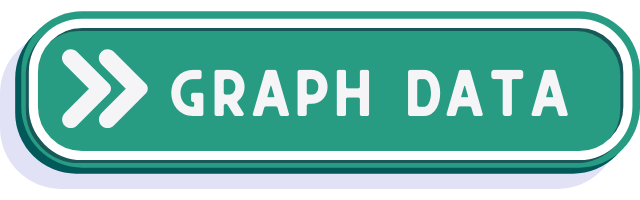

## Graph and visualize the data

### What was the highest total crime for each year?

In [28]:
crime_by_year = df.groupby(['year', 'crime_description']).size().reset_index(name='count')

# Sort by year and count in descending order
sorted_crime_by_year = crime_by_year.sort_values(by=['year', 'count'], ascending=[True, False])

# Get the top crime for each year
top_crime_by_year = sorted_crime_by_year.groupby('year').first().reset_index()

top_crime_by_year

,year,crime_description,count
0,2010,LARCENY,10380
1,2011,TRAFFIC,9238
2,2012,LARCENY,11491
3,2013,LARCENY,11894
4,2014,LARCENY,12756


### Basic visualizations to show the Worst dates for crime
- We could get as specific as we want here, but lets just do counts overall. 
- When we make our interactive dashboard we can dive deeper into the data

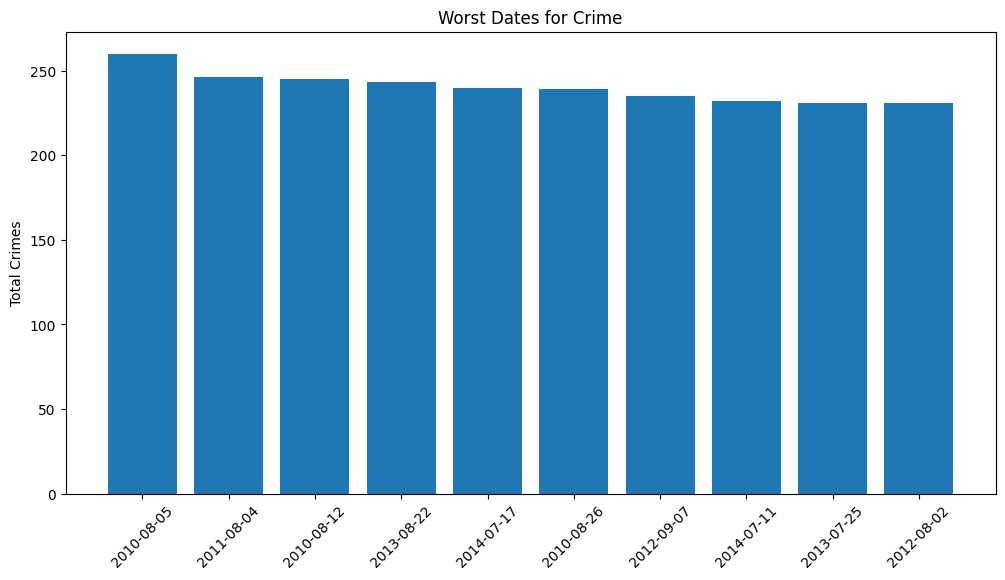

In [29]:
# Worst dates
crime_by_date = df.groupby('report_date').size().reset_index(name='crime_count')

# Sort by 'crime_count' in descending order
worst_date = crime_by_date.sort_values(by='crime_count', ascending=False)

# Get the top 10 worst dates
top_date = worst_date.head(10)


# Plot the top 10 worst dates
plt.figure(figsize=(12, 6))
plt.bar(top_date['report_date'].astype(str), top_date['crime_count'])
plt.ylabel('Total Crimes')
plt.title('Worst Dates for Crime')
plt.xticks(rotation=45)
plt.show()

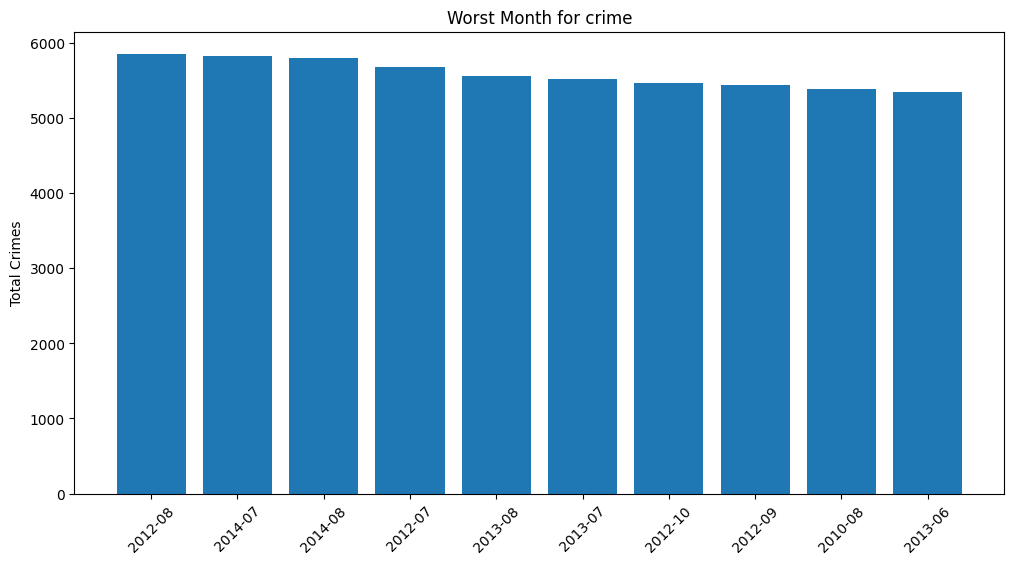

In [30]:
# Worst Month of crime

# Count the number of crimes per month
crime_by_month = df.groupby('month').size().reset_index(name='crime_count')

# Sort by the number of crimes in descending order to find the worst months
worst_months = crime_by_month.sort_values(by='crime_count', ascending=False)


# Plot the top 10 worst months
top_months = worst_months.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_months['month'].astype(str), top_months['crime_count'])
plt.ylabel('Total Crimes')
plt.title('Worst Month for crime')
plt.xticks(rotation=45)
plt.show()

### August seems to be a particularly bad month for crime having top numbers across multiple years

- August also appeared 6 times in our top 10 worst dates overall

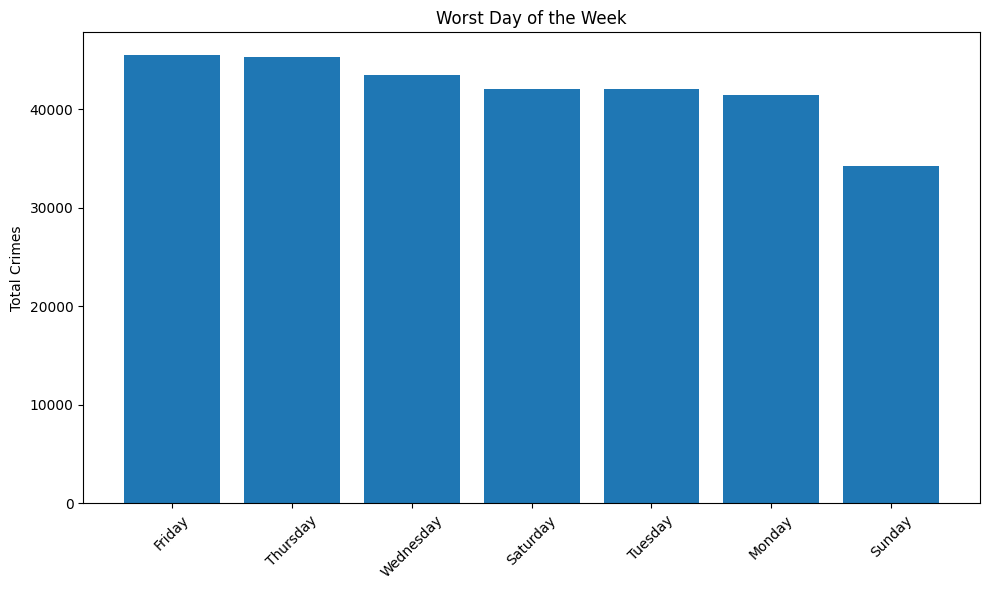

In [31]:
# Worst day for crime

# Count the number of crimes per day of the week
crime_by_day = df.groupby('day_of_week').size().reset_index(name='crime_count')

# Sort by the number of crimes in descending order
worst_day = crime_by_day.sort_values(by='crime_count', ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(worst_day['day_of_week'].astype(str), worst_day['crime_count'])
plt.ylabel('Total Crimes')
plt.title('Worst Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

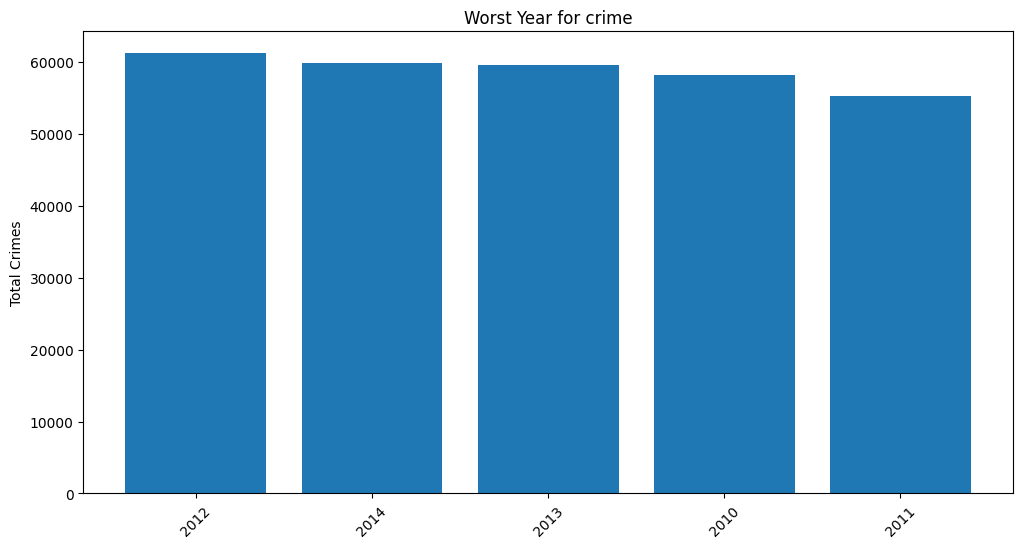

In [32]:
# Worst Year of crime

# Count the number of crimes per year
crime_by_year = df.groupby('year').size().reset_index(name='crime_count')

# Sort by the number of crimes in descending order to find the worst months
worst_years = crime_by_year.sort_values(by='crime_count', ascending=False)


# Plot the top 5 worst tear
top_months = worst_years.head(5)

plt.figure(figsize=(12, 6))
plt.bar(top_months['year'].astype(str), top_months['crime_count'])
plt.ylabel('Total Crimes')
plt.title('Worst Year for crime')
plt.xticks(rotation=45)
plt.show()

In [33]:
# Reformat 'year' is an integer for our next graph

crime_by_year['year'] = crime_by_year['year'].dt.year
crime_by_year['year'] = crime_by_year['year'].astype(int)

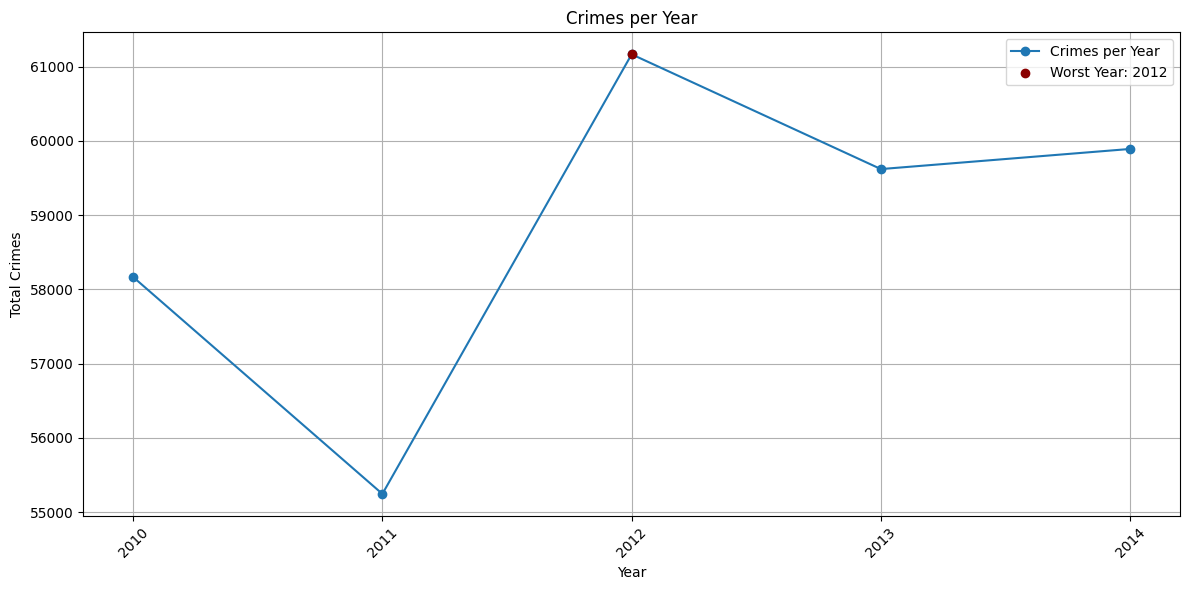

In [34]:
# Find the worst year (year with the maximum number of crimes)
worst_year = crime_by_year.loc[crime_by_year['crime_count'].idxmax()]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(crime_by_year['year'], crime_by_year['crime_count'], marker='o', linestyle='-', label='Crimes per Year')

# Highlight the worst year
plt.scatter(worst_year['year'], worst_year['crime_count'], color='darkred', zorder=5, label=f'Worst Year: {worst_year["year"]}')

# labels and title
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.title('Crimes per Year')

# matplot is trying to split years into half years, so lets fix this so we only see full years
plt.xticks(ticks=crime_by_year['year'], rotation=45)

plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [35]:
df

,case,crime_code,crime_description,report_date,closed_date,day_of_week,location,month,year
0,SL20143464,3599-0,DRUGS,2014-01-07,2014-01-07,Tuesday,200 S SURPRISE AVE,2014-01,2014
1,SL20143532,3510-0,DRUGS,2014-01-07,2014-01-07,Tuesday,200 S SURPRISE AVE,2014-01,2014
2,SL20147474,5707-0,INV OF PRIVACY,2014-01-14,2014-01-14,Tuesday,00 RIO GRANDE ST,2014-01,2014
3,SL20149841,5707-0,INV OF PRIVACY,2014-01-18,2014-01-18,Saturday,00 N RIO GRANDE ST,2014-01,2014
4,SL20143539,3599-0,DRUGS,2014-01-22,2014-01-22,Wednesday,200 S SURPRISE AVE,2014-01,2014
...,...,...,...,...,...,...,...,...,...
294085,SL2010223801,2399-0,LARCENY,2010-12-31,2010-12-31,Friday,100 W 2100 S,2010-12,2010
294086,SL2010223720,5499-7,TRAFFIC,2010-12-31,2010-12-31,Friday,900 S 900 W,2010-12,2010
294087,SL2011800082,7399-6,PUBLIC ORDER,2010-12-31,2011-01-27,Friday,700 N TERMINAL NORTHBOUND DR,2010-12,2010
294088,SL2010223916,7399-26,PUBLIC ORDER,2010-12-31,2010-12-31,Friday,400 S 600 E,2010-12,2010


### What is the longest gap from crime reported date and the case being closed?

- We can easily calculate this by finding the difference between report date and closed date

### What is the Slowest crime from report to closing


In [36]:
# Calculate the gap duration
df['case_duration'] = (df['closed_date'] - df['report_date']).dt.days

# Drop the few na
df = df.dropna().reset_index(drop=True)

# Making it int to get rid of the annoying trailing .0 (We only want whole days, no half or fractional days)
df['case_duration'] = df['case_duration'].astype(int)

# View the 10 slowest crimes
df.sort_values(by='case_duration', ascending=False).head(10)

,case,crime_code,crime_description,report_date,closed_date,day_of_week,location,month,year,case_duration
181279,SL2014804539,2699-1,FRAUD,2010-01-07,2014-11-12,Thursday,200 S MAIN ST,2010-01,2010,1770
182157,SL2014804594,2699-1,FRAUD,2010-01-13,2014-11-14,Wednesday,200 S MAIN ST,2010-01,2010,1766
180415,SL2014804262,2699-1,FRAUD,2010-01-01,2014-10-28,Friday,1700 W 2100 S,2010-01,2010,1761
184996,SL2014804556,2699-1,FRAUD,2010-01-31,2014-11-13,Sunday,900 E 300 S,2010-01,2010,1747
183241,SL2014802694,2699-1,FRAUD,2010-01-20,2014-07-31,Wednesday,1500 E BRYAN AVE,2010-01,2010,1653
180854,SL2014800992,2699-1,FRAUD,2010-01-04,2014-04-07,Monday,000 N T ST,2010-01,2010,1554
188461,SL201475171,5399-28,PUBLIC PEACE,2010-02-23,2014-05-09,Tuesday,1800 S 300 W,2010-02,2010,1536
181278,SL2014800162,2699-1,FRAUD,2010-01-07,2014-01-24,Thursday,200 S MAIN ST,2010-01,2010,1478
180414,SL2013801975,2699-1,FRAUD,2010-01-01,2013-12-25,Friday,1700 W 2100 S,2010-01,2010,1454
232333,SL2014804343,2699-1,FRAUD,2010-12-06,2014-11-01,Monday,200 S MAIN ST,2010-12,2010,1426


### Fraud is the slowest when it comes to closing the case
- lets see if we can find the top 5 crimes that take the longest

<hr>

### What are the top 5 slowest crimes from reporting to closing?

In [37]:
# Find the 5 slowest to close crimes when it comes to case_duration
case_durations = df.groupby('crime_description')['case_duration'].max().reset_index().round(2)

# Sort the results
case_durations.sort_values(by='case_duration', ascending=False).head(5)

,crime_description,case_duration
20,FRAUD,1770
40,PUBLIC PEACE,1536
39,PUBLIC ORDER,1403
16,EXPLOITATION,1154
28,LARCENY,1134


### These are the individual longest cases
- We will calculate the average closing next

In [38]:
df

,case,crime_code,crime_description,report_date,closed_date,day_of_week,location,month,year,case_duration
0,SL20143464,3599-0,DRUGS,2014-01-07,2014-01-07,Tuesday,200 S SURPRISE AVE,2014-01,2014,0
1,SL20143532,3510-0,DRUGS,2014-01-07,2014-01-07,Tuesday,200 S SURPRISE AVE,2014-01,2014,0
2,SL20147474,5707-0,INV OF PRIVACY,2014-01-14,2014-01-14,Tuesday,00 RIO GRANDE ST,2014-01,2014,0
3,SL20149841,5707-0,INV OF PRIVACY,2014-01-18,2014-01-18,Saturday,00 N RIO GRANDE ST,2014-01,2014,0
4,SL20143539,3599-0,DRUGS,2014-01-22,2014-01-22,Wednesday,200 S SURPRISE AVE,2014-01,2014,0
...,...,...,...,...,...,...,...,...,...,...
235578,SL2010223801,2399-0,LARCENY,2010-12-31,2010-12-31,Friday,100 W 2100 S,2010-12,2010,0
235579,SL2010223720,5499-7,TRAFFIC,2010-12-31,2010-12-31,Friday,900 S 900 W,2010-12,2010,0
235580,SL2011800082,7399-6,PUBLIC ORDER,2010-12-31,2011-01-27,Friday,700 N TERMINAL NORTHBOUND DR,2010-12,2010,27
235581,SL2010223916,7399-26,PUBLIC ORDER,2010-12-31,2010-12-31,Friday,400 S 600 E,2010-12,2010,0


### Lets check if cases reported on friday or saturday had a higher average closing date 
- Most would assume the weekend took longer to process it vs crimes during the regular week

### We could also check dates around the holidays to see if that impacted the closing speed

### How does the amount of reports currently reported affect the amount of tie it takes to close cases?

- Correlate amount of cases per month to the amount of time it takes to close cases

In [39]:
# Filter out cases that were closed same_day
df_filtered = df[df['case_duration'] > 0]

df_filtered.groupby('day_of_week')['case_duration'].max().sort_values(ascending=False)

day_of_week
Thursday     1770
Wednesday    1766
Friday       1761
Sunday       1747
Monday       1554
Tuesday      1536
Saturday     1423
Name: case_duration, dtype: int64

In [40]:
df_filtered.groupby('day_of_week')['case_duration'].mean().round(2).sort_values(ascending=False)

day_of_week
Monday       26.87
Tuesday      25.87
Wednesday    23.50
Friday       21.51
Thursday     21.27
Saturday     17.47
Sunday       14.22
Name: case_duration, dtype: float64

In [41]:
df_filtered.groupby('day_of_week')['case_duration'].sum().sort_values(ascending=False)

day_of_week
Monday       22600
Tuesday      21449
Friday       19573
Wednesday    17083
Thursday     16526
Saturday     13613
Sunday        8519
Name: case_duration, dtype: int64

In [42]:
# Define range to pull holidays from
years = range(2010, 2014)

holiday_dates = []

# Loop through the years and get holidays
for year in years:
    us_holidays = holidays.US(years=year)
    holiday_dates.extend(list(us_holidays.keys()))


df_holidays = pd.DataFrame(holiday_dates, columns=['holiday_date'])
df_holidays['holiday_date'] = pd.to_datetime(df_holidays['holiday_date'])

# Convert holiday_dates to a set for faster lookup
holiday_dates = set(df_holidays['holiday_date'].dt.strftime('%Y-%m-%d'))

# Create a column indicating if the date is a holiday
df_filtered['is_holiday'] = df_filtered['report_date'].dt.strftime('%Y-%m-%d').isin(holiday_dates)


# Calculate average case duration for holidays and non-holidays
avg_case_duration_holidays = df_filtered[df_filtered['is_holiday']]['case_duration'].mean().round(2)
avg_case_duration_non_holidays = df_filtered[~df_filtered['is_holiday']]['case_duration'].mean().round(2)


print('Results do not include cases closed on sameday as reported')
print('Results:')
print(f"Average case duration on holidays: {avg_case_duration_holidays}")
print(f"Average case duration on non-holidays: {avg_case_duration_non_holidays}")

Results do not include cases closed on sameday as reported
Results:
Average case duration on holidays: 35.99
Average case duration on non-holidays: 21.39


### According to the data cases reported on saturday actually closed faster than any other day

- Sunday and saturday also had the lowest amount of reported cases so they are more susceptible to outliers

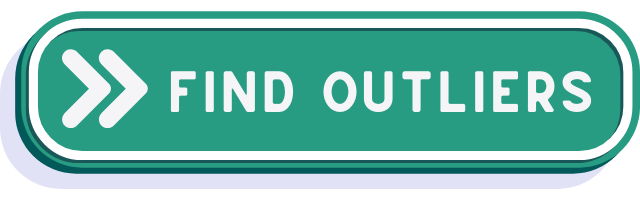

## Outliers

### Before we assume all of the inital results we just looked at... lets double check if there are outliers skewing our results
- We can use Interquartile Range (IQR) to check for outliers
    - The Interquartile Range (IQR) is the range between the third quartile and the first quartile. It measures the spread of the middle 50% of the data.
    
### The formula for the IQR is: 
### <code> \(IQR=Q3-Q1\) </code>

In [43]:
# use IQR to check for outliers in the Days data


def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers in case duration
outliers = detect_outliers(df, 'case_duration')

filtered_outliers = detect_outliers(df_filtered, 'case_duration')

# Summary Statistics
num_outliers = len(filtered_outliers)
avg_duration_outliers = filtered_outliers['case_duration'].mean()
min_duration_outliers = filtered_outliers['case_duration'].min()
max_duration_outliers = filtered_outliers['case_duration'].max()

# Print Summary
print("Outliers Summary:")
print(f"Number of outliers: {num_outliers}")
print(f"Average case duration of outliers: {avg_duration_outliers:.2f}")
print(f"Minimum case duration of outliers: {min_duration_outliers}")
print(f"Maximum case duration of outliers: {max_duration_outliers}")


Outliers Summary:
Number of outliers: 744
Average case duration of outliers: 140.70
Minimum case duration of outliers: 17
Maximum case duration of outliers: 1770


In [44]:
# Calculate average case duration with outliers
avg_case_duration_all = df['case_duration'].mean().round(2)

# Filter out outliers
df_without_outliers = df[~df['case_duration'].isin(outliers['case_duration'])]

# Calculate average case duration without outliers
avg_case_duration_no_outliers = df_without_outliers['case_duration'].mean().round(2)

print(f"Average case duration (with outliers): {avg_case_duration_all}")
print(f"Average case duration (without outliers): {avg_case_duration_no_outliers}")


Average case duration (with outliers): -0.66
Average case duration (without outliers): 0.0


In [45]:
df[df['case_duration'].isin(outliers['case_duration'])]

,case,crime_code,crime_description,report_date,closed_date,day_of_week,location,month,year,case_duration
15,SL201443371,3618-0,SEX OFFENSES,2014-03-17,2014-03-16,Sunday,UNKNOWN ADDRESS,2014-03,2014,-1
19,SL201441333,3599-99,DRUGS,2014-04-01,2014-03-30,Sunday,200 S SURPRISE AVE,2014-04,2014,-2
25,SL201457455,2203-0,BURGLARY,2014-04-10,2014-04-09,Wednesday,3700 W 700 S,2014-04,2014,-1
29,SL201476787,2399-0,LARCENY,2014-05-12,2014-04-26,Saturday,00 N RIO GRANDE ST,2014-05,2014,-16
32,SL2014801435,2305-0,LARCENY,2014-05-12,2014-05-10,Saturday,300 W 2100 S,2014-05,2014,-2
...,...,...,...,...,...,...,...,...,...,...
235573,SL20111308,2204-0,BURGLARY,2010-12-31,2011-01-03,Friday,1000 E DOWNINGTON AVE,2010-12,2010,3
235575,SL20112270,7399-3,PUBLIC ORDER,2010-12-31,2011-01-05,Friday,1200 N VICTORIA WAY,2010-12,2010,5
235576,SL20113614,2399-19,LARCENY,2010-12-31,2011-01-07,Friday,1800 E HARVARD AVE,2010-12,2010,7
235580,SL2011800082,7399-6,PUBLIC ORDER,2010-12-31,2011-01-27,Friday,700 N TERMINAL NORTHBOUND DR,2010-12,2010,27


In [46]:
df[df['case_duration'] < 0].reset_index(drop=True)

,case,crime_code,crime_description,report_date,closed_date,day_of_week,location,month,year,case_duration
0,SL201443371,3618-0,SEX OFFENSES,2014-03-17,2014-03-16,Sunday,UNKNOWN ADDRESS,2014-03,2014,-1
1,SL201441333,3599-99,DRUGS,2014-04-01,2014-03-30,Sunday,200 S SURPRISE AVE,2014-04,2014,-2
2,SL201457455,2203-0,BURGLARY,2014-04-10,2014-04-09,Wednesday,3700 W 700 S,2014-04,2014,-1
3,SL201476787,2399-0,LARCENY,2014-05-12,2014-04-26,Saturday,00 N RIO GRANDE ST,2014-05,2014,-16
4,SL2014801435,2305-0,LARCENY,2014-05-12,2014-05-10,Saturday,300 W 2100 S,2014-05,2014,-2
...,...,...,...,...,...,...,...,...,...,...
19460,SL20133716,3599-98,DRUGS,2013-01-08,2012-12-31,Monday,800 S JEFFERSON ST,2013-01,2013,-8
19461,SL20135432,2606-0,FRAUD,2013-01-11,2012-12-31,Monday,700 S MAIN ST,2013-01,2013,-11
19462,SL2013800054,2305-0,LARCENY,2013-01-03,2012-12-31,Monday,900 S 200 W,2013-01,2013,-3
19463,SL201339347,2499-16,STOLEN VEHICLE,2013-03-15,2012-12-31,Monday,100 W 600 S,2013-03,2013,-74


### We have 24927 total outliers, and 19465 of those the case was closed before it was even reported. Without having access to more information we cannot detirmine why that is the case
- Lets remove SOME outliers from our data
    - Instead of removing ALL outliers, I only want to remove the troublesome data with cases reporting closed BEFORE the report date


In [47]:
df = df[~df['case_duration'] < 0].reset_index(drop=True)

df

,case,crime_code,crime_description,report_date,closed_date,day_of_week,location,month,year,case_duration
0,SL20143464,3599-0,DRUGS,2014-01-07,2014-01-07,Tuesday,200 S SURPRISE AVE,2014-01,2014,0
1,SL20143532,3510-0,DRUGS,2014-01-07,2014-01-07,Tuesday,200 S SURPRISE AVE,2014-01,2014,0
2,SL20147474,5707-0,INV OF PRIVACY,2014-01-14,2014-01-14,Tuesday,00 RIO GRANDE ST,2014-01,2014,0
3,SL20149841,5707-0,INV OF PRIVACY,2014-01-18,2014-01-18,Saturday,00 N RIO GRANDE ST,2014-01,2014,0
4,SL20143539,3599-0,DRUGS,2014-01-22,2014-01-22,Wednesday,200 S SURPRISE AVE,2014-01,2014,0
...,...,...,...,...,...,...,...,...,...,...
216113,SL2010223801,2399-0,LARCENY,2010-12-31,2010-12-31,Friday,100 W 2100 S,2010-12,2010,0
216114,SL2010223720,5499-7,TRAFFIC,2010-12-31,2010-12-31,Friday,900 S 900 W,2010-12,2010,0
216115,SL2011800082,7399-6,PUBLIC ORDER,2010-12-31,2011-01-27,Friday,700 N TERMINAL NORTHBOUND DR,2010-12,2010,27
216116,SL2010223916,7399-26,PUBLIC ORDER,2010-12-31,2010-12-31,Friday,400 S 600 E,2010-12,2010,0


### After removing outliers we are left with 216118 rows of data. 
- We started with 295925 rows. So we have dropped 79807 of na, outliers, and incomplete data.
- This is a significant amount and we may want to think about keeping more data and instead fixing the values instead of removing them

In [48]:
# Calculate average case duration without outliers
avg_case_duration = df['case_duration'].mean().round(2)

print('Average case durations:')
print()
print(f"Original avg with all outliers: {avg_case_duration_all}")
print(f"avg without ANY outliers: {avg_case_duration_no_outliers}")
print(f"avg with negative durations removed: {avg_case_duration}")

Average case durations:

Original avg with all outliers: -0.66
avg without ANY outliers: 0.0
avg with negative durations removed: 0.55


### Removing the outliers definitely helps with the issue... but it does not fix how many 'Same_day' cases we have skewing our results

- We need to do our best as analysts to Clean and prepare the data to the best of our ability.
- Removing these outliers is just one of MANY steps to getting more accurate reporting and making more accurate data-driven decisions. 

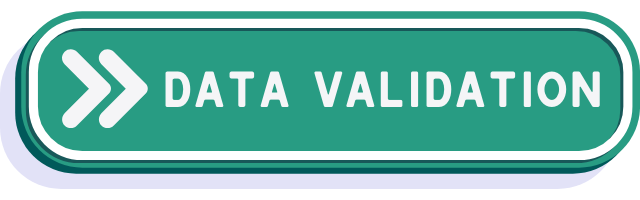

## Lets recheck some of our data now that we have identified and removed the outliers
- We can do this a few different ways, for now I am just going to copy a few blocks to check the results right here


In [49]:
# Calculate data including the zeroes

count_by_day_zeroes = df.groupby('day_of_week')['case_duration'].max().sort_values(ascending=False)
avg_by_day_zeroes = df.groupby('day_of_week')['case_duration'].mean().round(2).sort_values(ascending=False)
total_cases_by_day_zeroes = df.groupby('day_of_week')['case_duration'].sum().sort_values(ascending=False)

In [50]:
# Calculate data without zeroes

count_by_day = df_filtered.groupby('day_of_week')['case_duration'].max().sort_values(ascending=False)
avg_by_day = df_filtered.groupby('day_of_week')['case_duration'].mean().round(2).sort_values(ascending=False)
total_cases_by_day = df_filtered.groupby('day_of_week')['case_duration'].sum().sort_values(ascending=False)


In [51]:
# How many same day cases do we have??

len(df[df['case_duration'] == 0])

210656

In [52]:
# How many cases do we have that take longer than 1 day to close??

len(df[df['case_duration'] != 0])

5462

### Results With same_day cases 

In [53]:
print(f"Avg case durations: \n  {avg_by_day_zeroes}")

Avg case durations: 
  day_of_week
Monday       0.74
Tuesday      0.69
Friday       0.59
Wednesday    0.53
Thursday     0.49
Saturday     0.45
Sunday       0.34
Name: case_duration, dtype: float64


### Results Without zeroes(same_day) cases 

In [54]:
print(f"Avg case durations: \n  {avg_by_day}")

Avg case durations: 
  day_of_week
Monday       26.87
Tuesday      25.87
Wednesday    23.50
Friday       21.51
Thursday     21.27
Saturday     17.47
Sunday       14.22
Name: case_duration, dtype: float64


### Worst day for each crime reported

In [55]:
# group the crimes by day
count_crimes_by_day = df.groupby('crime_description')['day_of_week'].value_counts().reset_index()

# Find the day with the max count for each crime
max_count_days  = count_crimes_by_day.loc[count_crimes_by_day.groupby('crime_description')['count'].idxmax()]

# save 10 worst crimes for use later
worst_crime_days = max_count_days
worst_crime_days = worst_crime_days.sort_values('count', ascending=False).head(10)

# sort and display the results for each crime
max_count_days.sort_values('count', ascending=False)

,crime_description,day_of_week,count
146,LARCENY,Monday,5907
280,TRAFFIC,Friday,5282
207,PUBLIC ORDER,Friday,5223
214,PUBLIC PEACE,Thursday,2722
8,ASSAULT,Saturday,2508
69,ESCAPE,Thursday,2409
125,INV OF PRIVACY,Thursday,1658
54,DRUGS,Thursday,1638
47,DAMAGED PROP,Monday,1605
266,STOLEN VEHICLE,Monday,1218


In [56]:
# Function to get top two days
def get_top_two_days(group):
    sorted_group = group.sort_values(by='count', ascending=False)
    top_two = sorted_group.head(2)
    return pd.Series({
        'worst_day': top_two.iloc[0]['day_of_week'],
        'worst_count': top_two.iloc[0]['count'],
        'second_worst_day': top_two.iloc[1]['day_of_week'] if len(top_two) > 1 else None,
        'second_worst_count': top_two.iloc[1]['count'] if len(top_two) > 1 else None
    })

# Apply the function to see both worst and second worst days for each crime
results = count_crimes_by_day.groupby('crime_description').apply(get_top_two_days).reset_index()

# remove rows that have no second worst day
filtered_results = results[results['second_worst_count'].notna()]

# fix the float values to in so there is no ugly trailing .0
filtered_results['second_worst_count'] = filtered_results['second_worst_count'].astype(int)

# Sort the results by counts
filtered_results.sort_values('worst_count', ascending=False).reset_index(drop=True)

,crime_description,worst_day,worst_count,second_worst_day,second_worst_count
0,LARCENY,Monday,5907,Friday,5880
1,TRAFFIC,Friday,5282,Thursday,5268
2,PUBLIC ORDER,Friday,5223,Thursday,4962
3,PUBLIC PEACE,Thursday,2722,Wednesday,2514
4,ASSAULT,Saturday,2508,Sunday,2480
5,ESCAPE,Thursday,2409,Saturday,2349
6,INV OF PRIVACY,Thursday,1658,Wednesday,1570
7,DRUGS,Thursday,1638,Tuesday,1558
8,DAMAGED PROP,Monday,1605,Sunday,1562
9,STOLEN VEHICLE,Monday,1218,Tuesday,1156


In [57]:
# Compare worst crime days overall VS the worst crime days for the top 10 worst crimes

worst_crime_days

,crime_description,day_of_week,count
146,LARCENY,Monday,5907
280,TRAFFIC,Friday,5282
207,PUBLIC ORDER,Friday,5223
214,PUBLIC PEACE,Thursday,2722
8,ASSAULT,Saturday,2508
69,ESCAPE,Thursday,2409
125,INV OF PRIVACY,Thursday,1658
54,DRUGS,Thursday,1638
47,DAMAGED PROP,Monday,1605
266,STOLEN VEHICLE,Monday,1218


In [58]:
worst_days_overall = df['day_of_week'].value_counts().sort_values(ascending=False).reset_index()

worst_days_overall

,day_of_week,count
0,Thursday,33575
1,Friday,33184
2,Wednesday,31949
3,Tuesday,30946
4,Monday,30585
5,Saturday,30559
6,Sunday,25320


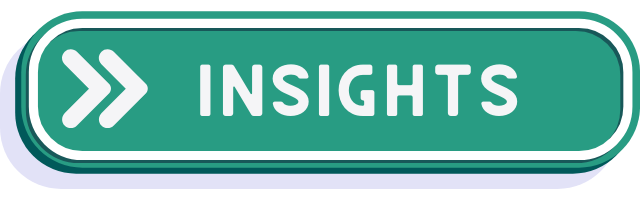

## Important Insights:

### Crime Counts
The dataset reveals a broad range of crime types, with **LARCENY** being the most frequent, followed by **PUBLIC ORDER** and **TRAFFIC** offenses. 
- The total number of recorded crimes varies significantly by type, indicating diverse criminal activities.

### Worst Year for Crime
From 2010 through 2014, crime trends varied, with **LARCENY** consistently topping the list of most frequent crimes. 
- The year 2014 experienced the highest count of LARCENY crimes, marking it as the worst year for this category.

### Crime Trends by Day of the Week
**Thursday** emerges as the day with the highest overall crime count, followed closely by **Friday**. When broken down by crime type:
- **LARCENY** peaks on **Monday**.
- **TRAFFIC** offenses are most frequent on **Friday**.
- **PUBLIC ORDER** crimes are also highest on **Friday**.

### Longest and Average Case Processing Times
The time taken to resolve cases varies by crime type:
- **FRAUD** cases have the longest processing time, averaging 1770 days.
- **EXPLOITATION** cases are resolved the quickest, with an average of 230.8 days.

### Seasonal Patterns
**Summer** has the highest crime count, followed by **Fall**, **Spring**, and **Winter**. 
- The data suggests seasonal variation in crime rates, with different types of crimes peaking in specific seasons.

These insights can help in understanding crime trends and focusing resources more effectively based on temporal and spatial patterns.



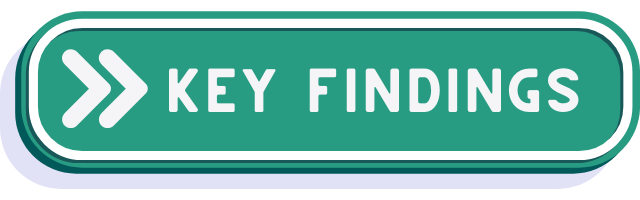

## Key Findings on Daily Crime trends

### Larceny on Mondays
- **Observation:** Larceny incidents peak on Mondays with 5,907 occurrences.
- **Possible Explanation:** The start of the workweek may create opportunities for looting as people return to their routines. The increased activity and busier environments on Mondays might be exploited by criminals.

### Traffic and Public Order Crimes on Fridays
- **Observation:** Traffic violations and public order crimes are highest on Fridays, with counts of 5,282 and 5,223, respectively.
- **Possible Explanation:** The end of the workweek often brings relaxed attitudes and increased social activities, potentially leading to more traffic offenses and public disturbances.

### Public Peace Crimes on Thursdays
- **Observation:** Public peace crimes are most frequent on Thursdays, totaling 2,722 incidents.
- **Possible Explanation:** Midweek stress and tension may contribute to disturbances. Additionally, increased socialization on Thursday evenings might lead to more public peace violations.

### Assaults on Saturdays
- **Observation:** Assault incidents are notably high on Saturdays with 2,508 reported cases.
- **Possible Explanation:** Weekend social activities and parties often lead to increased alcohol consumption and potential conflicts, resulting in a higher incidence of assaults.

### Weekend Crime Trends
- **Observation:** Saturdays and Sundays show elevated counts for crimes such as assault, robbery, and sexual offenses.
- **Possible Explanation:** Social gatherings and increased interactions over the weekend may contribute to higher crime rates, including violence and sexual offenses.

### Midweek Trends
- **Observation:** Wednesdays have significant counts for liquor-related offenses, property crimes, and various other offenses.
- **Possible Explanation:** Midweek social dynamics and routines might influence specific crime types differently compared to weekends.

## Conclusion
- The data reveals that crime patterns are strongly influenced by the day of the week and seasonal variations. Mondays and Fridays are associated with distinct crime types due to transitions between work and personal life, while weekends see increased crime rates linked to social activities. 

- Understanding these patterns can inform targeted crime prevention strategies, such as focused policing on peak days and addressing specific crime types prevalent on different days. Additionally, recognizing seasonal trends can help in planning resource allocation throughout the year.


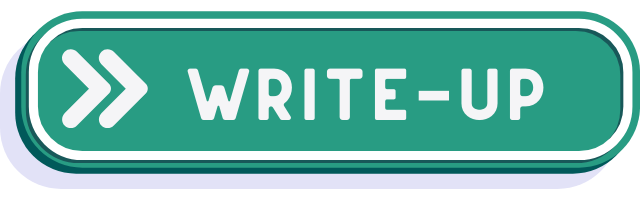

## Full Write-up and Tableau MAP

### [Notion write-up](https://camdoesdata.notion.site/SLC-Crime-Data-25cb7fa1c63f43a1ace9960ebfc9a5e9?pvs=74)

### [Tableau Map](https://public.tableau.com/views/SLCCrimeReports2010-2014/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)